<a href="https://colab.research.google.com/github/martindevoto/machine-learning-notebooks-personal/blob/main/Repaso_PyCaret_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret shap

     |████████████████████████████████| 288 kB 4.6 MB/s 
     |████████████████████████████████| 371 kB 44.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.5 MB 1.2 MB/s 
     |████████████████████████████████| 6.8 MB 59.6 MB/s 
     |████████████████████████████████| 261 kB 52.0 MB/s 
     |████████████████████████████████| 2.0 MB 52.2 MB/s 
     |████████████████████████████████| 86 kB 5.4 MB/s 
     |████████████████████████████████| 1.3 MB 39.4 MB/s 
     |████████████████████████████████| 1.7 MB 46.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 56 kB 4.8 MB/s 
     |████████████████████████████████| 113 kB 58.4 MB/s 
     |████████████████████████████████| 167 kB 64.6 MB/s 
     |████████

In [ ]:
import numpy as np
import pandas as pd

from pycaret.regression import *
from pycaret.utils import  version
from sklearn.datasets import load_boston

In [ ]:
version()

'2.3.5'

In [ ]:
boston = load_boston()

In [ ]:
features = pd.DataFrame(data=load_boston()['data'], 
                     columns=load_boston()['feature_names'])

In [ ]:
target = pd.DataFrame(data=load_boston()['target'], columns=['target'])

In [ ]:
df = features.merge(target, left_index=True, right_index=True)

In [ ]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
df_train = df.sample(frac=0.8, random_state=42)
df_test = df.drop(df_train.index)

df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [ ]:
reg1 = setup(df_train, target='target', session_id=123, log_experiment=True, 
             experiment_name='A ver esto 2')


# reg_fcr = setup(data=dataset,
#                 target='Actual Value', 
#                 session_id=786, 
#                 transformation=True,
#                 normalize=False,
#                 transform_target = True, 
#                 train_size=0.75, 
#                 numeric_imputation = 'mean',
#                 numeric_features=('Sunday', 'Monday', 'Saturday', 'Thursday',
#                                   'Tuesday', 'Wednesday', 'Friday', 
#                                   'Total number of calls', 'CSat', 
#                                   'total coaching', 'total coaching improved',
#                                   'FCR Week before'),
#                 categorical_features = ['dayofweek','quarter','month','year',
#                                      'dayofyear','dayofmonth','weekofyear',
#                                      'flag'],
#                 remove_outliers=True,
#                 outliers_threshold=0.05, 
#                 remove_multicollinearity=True, 
#                 multicollinearity_threshold=0.9,
#                 feature_selection=True,
#                 feature_interaction=True,
#                 silent=False,
#                 ignore_features=['Agent_ID'],
#                 combine_rare_levels=True,
#                 rare_level_threshold = 0.1
#                 polynomial_features=True,
#                 trigonometry_features=True, 
#                 feature_selection_threshold=0.4, 
#                 feature_selection_method='classic', 
#                 folds_shuffle=True,
#                 pca=True, 
#                 log_experiment=True,
#                 experiment_name='reg_fcr_experiments', log_plots=True,)

,Description,Value
0,session_id,123
1,Target,target
2,Original Data,"(405, 14)"
3,Missing Values,False
4,Numeric Features,12
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(283, 13)"


In [ ]:
best_model = compare_models(fold=10, sort='R2')

# best = compare_models(exclude = ['ransac'], n_select=3, round=2,
#                       blacklist = ['tr'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.3238,11.2590,3.2106,0.8520,0.1480,0.1145,0.078
et,Extra Trees Regressor,2.2183,11.6961,3.1984,0.8510,0.1366,0.1069,0.407
rf,Random Forest Regressor,2.4443,13.8019,3.4876,0.8244,0.1509,0.1197,0.467
lightgbm,Light Gradient Boosting Machine,2.6412,15.4317,3.7834,0.8081,0.1623,0.1269,0.065
ada,AdaBoost Regressor,3.0137,17.5106,4.0580,0.7788,0.1799,0.1523,0.086
dt,Decision Tree Regressor,3.2915,25.7885,4.7047,0.6562,0.1996,0.1582,0.016
ridge,Ridge Regression,3.8746,28.8787,5.2602,0.6399,0.2866,0.1891,0.013
lr,Linear Regression,3.8810,28.6476,5.2411,0.6373,0.3018,0.1890,0.288
br,Bayesian Ridge,3.9615,29.7734,5.3364,0.6354,0.2795,0.1920,0.013
en,Elastic Net,4.1128,32.3590,5.5451,0.6200,0.2912,0.1935,0.014


In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [ ]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.1121,6.8804,2.6231,0.7988,0.1327,0.1158
1,2.4574,9.8333,3.1358,0.8622,0.1251,0.1061
2,2.0370,7.4559,2.7305,0.9445,0.1661,0.1234
3,2.3736,8.3737,2.8937,0.9423,0.1438,0.1182
4,1.8996,6.3758,2.5250,0.8845,0.1408,0.0979
5,2.3557,9.9798,3.1591,0.8781,0.1366,0.1061
6,1.9443,6.5003,2.5496,0.8820,0.1314,0.1098
7,2.0959,6.5427,2.5579,0.9451,0.0985,0.0824
8,2.6674,17.2206,4.1498,0.7995,0.1931,0.1394
9,3.2946,33.4272,5.7816,0.5832,0.2114,0.1460


In [ ]:
print(gbr)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [ ]:
tuned_gbr= tune_model(gbr, optimize='MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.2801,8.3803,2.8949,0.7549,0.1420,0.1145
1,2.6789,11.1370,3.3372,0.8440,0.1465,0.1273
2,1.9591,8.0649,2.8399,0.9399,0.1522,0.1097
3,2.6001,9.7720,3.1260,0.9327,0.1524,0.1130
4,2.5006,12.1301,3.4828,0.7803,0.1904,0.1295
5,2.2844,9.2233,3.0370,0.8873,0.1311,0.1008
6,2.8827,13.2617,3.6417,0.7592,0.1895,0.1523
7,2.4009,9.2871,3.0475,0.9221,0.1234,0.0983
8,2.5603,18.3671,4.2857,0.7862,0.1966,0.1376
9,3.3512,34.0964,5.8392,0.5748,0.2026,0.1474


In [ ]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.9172,19.1007,4.3704,0.4413,0.1916,0.1499
1,2.9345,15.7403,3.9674,0.7795,0.1430,0.1208
2,3.5172,29.8979,5.4679,0.7773,0.2271,0.1621
3,1.9679,6.0339,2.4564,0.9584,0.1562,0.1174
4,2.6536,13.0139,3.6075,0.7643,0.1557,0.1346
5,2.8929,18.4936,4.3004,0.7741,0.1752,0.1273
6,2.9143,14.8950,3.8594,0.7296,0.1878,0.1604
7,3.7750,18.0425,4.2476,0.8486,0.2034,0.1646
8,3.4714,22.8336,4.7784,0.7342,0.1927,0.1600
9,5.8714,99.8336,9.9917,-0.2449,0.3636,0.2851


In [ ]:
bagged_dt = ensemble_model(dt, n_estimators=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.1608,7.9944,2.8274,0.7662,0.1474,0.1201
1,2.2590,8.5156,2.9181,0.8807,0.1082,0.0935
2,2.5626,17.5959,4.1947,0.8689,0.1737,0.1318
3,2.5830,11.2060,3.3475,0.9228,0.1558,0.1284
4,1.7223,4.4809,2.1168,0.9189,0.1013,0.0885
5,2.4317,12.4289,3.5255,0.8482,0.1390,0.1044
6,1.9076,5.7231,2.3923,0.8961,0.1307,0.1108
7,2.0066,5.7133,2.3902,0.9521,0.0995,0.0845
8,3.0960,19.9209,4.4633,0.7681,0.2149,0.1666
9,3.6946,49.0322,7.0023,0.3886,0.2457,0.1671


In [ ]:
boosted_dt = ensemble_model(dt, method='Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.7793,14.8200,3.8497,0.5665,0.1885,0.1559
1,1.9724,7.6903,2.7731,0.8923,0.1018,0.0823
2,2.2379,8.4921,2.9141,0.9367,0.1293,0.1114
3,1.8893,5.1182,2.2623,0.9647,0.1459,0.1117
4,1.5536,3.8096,1.9518,0.9310,0.0941,0.0786
5,3.1929,21.6857,4.6568,0.7351,0.1873,0.1378
6,1.7071,4.7979,2.1904,0.9129,0.1268,0.1040
7,2.0750,6.2939,2.5088,0.9472,0.1005,0.0852
8,2.4607,10.4068,3.2260,0.8788,0.1498,0.1139
9,3.6464,40.0625,6.3295,0.5004,0.2528,0.1645


In [ ]:
stacker = stack_models(estimator_list=compare_models(n_select=5, fold=10,))
# stacker = stack_models(estimator_list = [boosted_dt,bagged_dt,tuned_rf],
#                        meta_model=rf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.2657,8.4291,2.9033,0.7535,0.1415,0.1212
1,2.0153,6.8925,2.6254,0.9034,0.0990,0.0842
2,2.1997,10.7463,3.2782,0.9199,0.1641,0.1264
3,2.0072,5.4046,2.3248,0.9628,0.1241,0.1025
4,2.4274,10.7675,3.2814,0.8050,0.4400,0.1462
5,2.4372,11.2569,3.3551,0.8625,0.1329,0.1019
6,1.8913,6.5555,2.5604,0.8810,0.1382,0.1105
7,1.5976,4.0616,2.0154,0.9659,0.0830,0.0643
8,3.0417,16.9313,4.1148,0.8029,0.1802,0.1436
9,3.0862,33.5920,5.7959,0.5811,0.2050,0.1296


In [ ]:
blender = blend_models(estimator_list=[bagged_dt, boosted_dt])
# blend_soft = blend_models(estimator_list = [tuned_lgbm1, 
#                                             uned_xgboost1, tuned_gbc1,
#                                             tuned_et1], method = 'soft')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.3417,10.4819,3.2376,0.6934,0.1642,0.1314
1,2.0834,7.6757,2.7705,0.8925,0.1011,0.0858
2,2.1794,10.6417,3.2622,0.9207,0.1396,0.1110
3,2.1537,6.6430,2.5774,0.9542,0.1469,0.1174
4,1.5532,3.5263,1.8778,0.9361,0.0904,0.0792
5,2.7529,15.3426,3.9170,0.8126,0.1510,0.1188
6,1.6206,4.1354,2.0336,0.9249,0.1195,0.0990
7,1.9824,5.5701,2.3601,0.9533,0.0945,0.0804
8,2.6491,13.0360,3.6105,0.8482,0.1764,0.1347
9,3.6047,42.0759,6.4866,0.4753,0.2373,0.1632


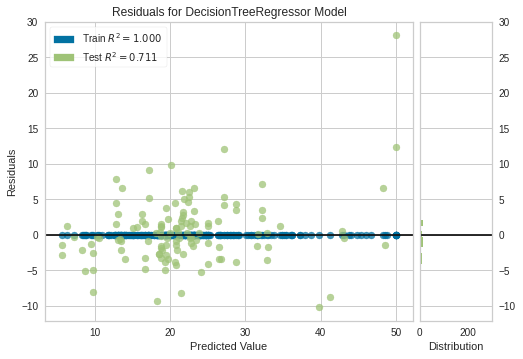

In [ ]:
plot_model(dt)

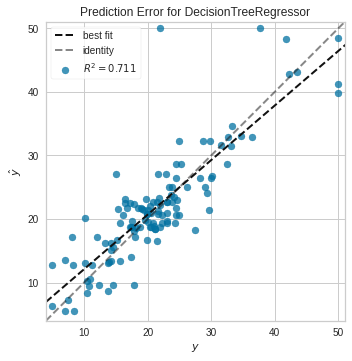

In [ ]:
plot_model(dt, plot='error')

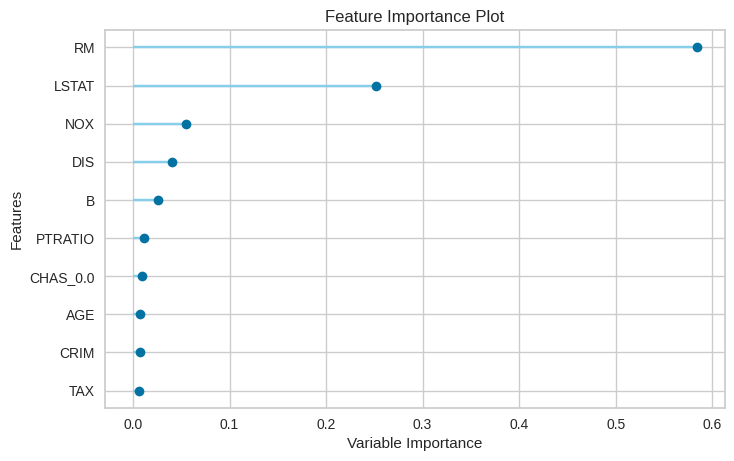

In [ ]:
plot_model(dt, plot='feature')

In [ ]:
evaluate_model(dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

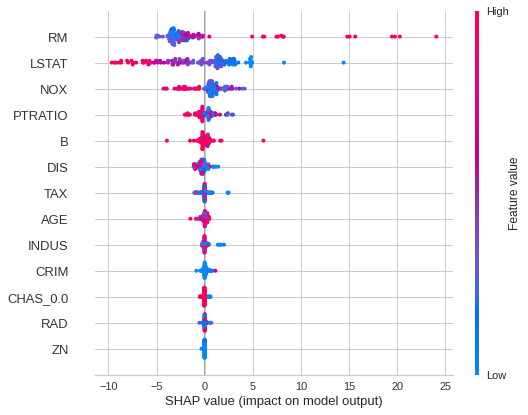

In [ ]:
interpret_model(dt)

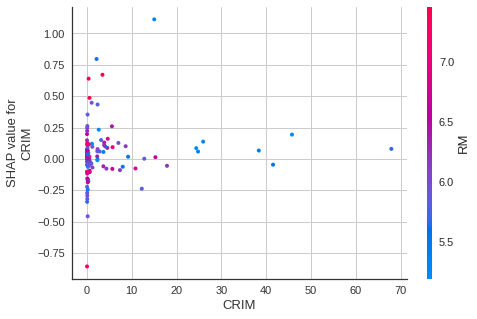

In [ ]:
interpret_model(dt, plot='correlation')

In [ ]:
interpret_model(dt, plot='reason', observation=50)

In [ ]:
best = automl(optimize='MAE')
best

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)

In [ ]:
unseen_predictions = predict_model(tuned_gbr, data=df_test)

In [ ]:
unseen_predictions

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target,Label
0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,23.585085
1,0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4.0,307.0,21.0,396.90,8.26,20.4,20.206439
2,1.25179,0.0,8.14,0.0,0.538,5.570,98.1,3.7979,4.0,307.0,21.0,376.57,21.02,13.6,16.025185
3,0.85204,0.0,8.14,0.0,0.538,5.965,89.2,4.0123,4.0,307.0,21.0,392.53,13.83,19.6,18.429490
4,1.61282,0.0,8.14,0.0,0.538,6.096,96.9,3.7598,4.0,307.0,21.0,248.31,20.34,13.5,15.191101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.15086,0.0,27.74,0.0,0.609,5.454,92.7,1.8209,4.0,711.0,20.1,395.09,18.06,15.2,15.896654
97,0.27957,0.0,9.69,0.0,0.585,5.926,42.6,2.3817,6.0,391.0,19.2,396.90,13.59,24.5,22.194130
98,0.23912,0.0,9.69,0.0,0.585,6.019,65.3,2.4091,6.0,391.0,19.2,396.90,12.92,21.2,22.453719
99,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,21.673085


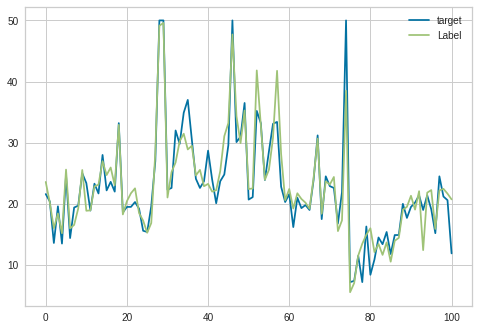

In [ ]:
unseen_predictions[['target', 'Label']].plot();